In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import structural_similarity as ssim


In [2]:
video = cv2.VideoCapture('stereo_video.mp4')


In [3]:
frame_count = 0
keyframes = []
keyframe_durations = []
ssim_scores = []
scene_transitions = []
keyframe_interval = 60

In [4]:
while True:
    ret, frame = video.read()
    if not ret:
        break
    frame_count += 1
    if frame_count % keyframe_interval == 0:
        keyframes.append(frame)
        keyframe_durations.append(frame_count / video.get(cv2.CAP_PROP_FPS))

In [5]:
print(frame_count)
for i in range(1, len(keyframes)):
    prev_frame = keyframes[i-1]
    current_frame = keyframes[i]
    ssim_scores.append(ssim(prev_frame, current_frame, multichannel=True, channel_axis=2))


1073


In [6]:
# Transition occurs if they SSIM score has seen a drop
for i in range(1, len(ssim_scores)):
    prev_ssim_score = ssim_scores[i-1]
    current_ssim_score = ssim_scores[i]
    if current_ssim_score < prev_ssim_score:
        scene_transitions.append(i * keyframe_interval)


In [7]:
video.release()

In [8]:
print("Keyframe Durations:", keyframe_durations)
print("Image Quality Metrics (SSIM):", ssim_scores)
print("Scene Transitions:", scene_transitions)


Keyframe Durations: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]
Image Quality Metrics (SSIM): [0.5535785381444502, 0.5832537407187702, 0.5532852036335291, 0.47864300032089924, 0.47964487191024346, 0.47607067287585547, 0.5334799790578998, 0.4935461579446467, 0.4752079496647336, 0.522929078898342, 0.40263943557019166, 0.35179674271624495, 0.4880067450448318, 0.5706428505510501, 0.5089398309727485, 0.4782352437577022]
Scene Transitions: [120, 180, 300, 420, 480, 600, 660, 840, 900]


Scene transition  1


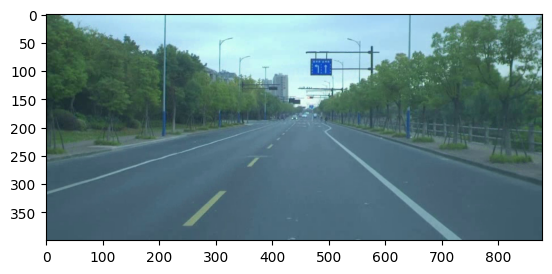

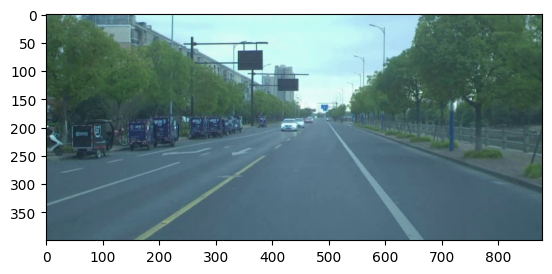

---------------------------------------------------------------
Scene transition  2


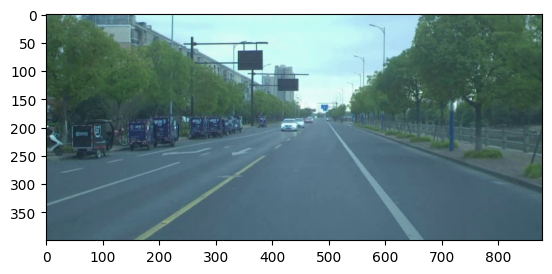

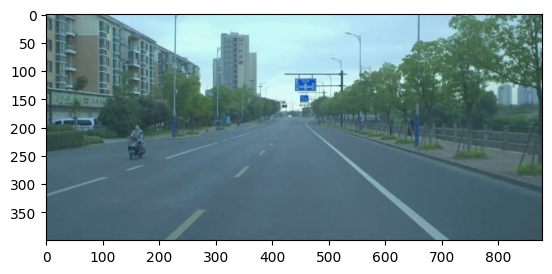

---------------------------------------------------------------
Scene transition  3


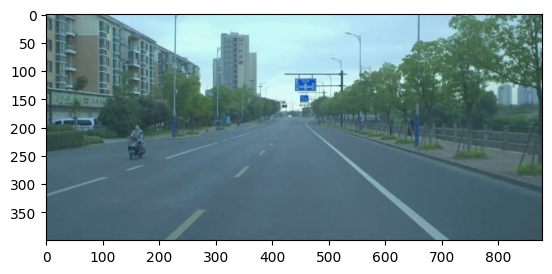

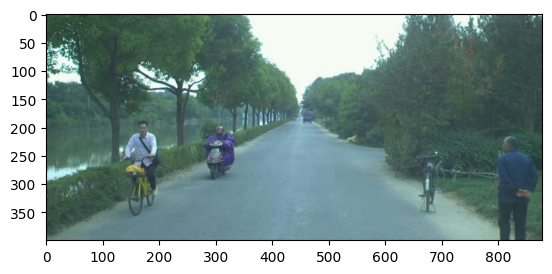

---------------------------------------------------------------
Scene transition  4


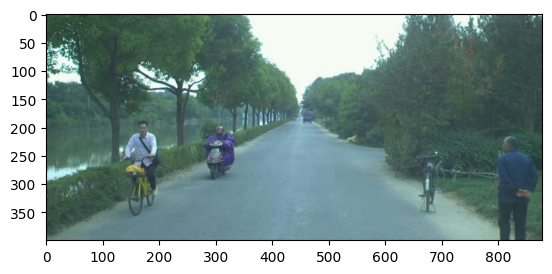

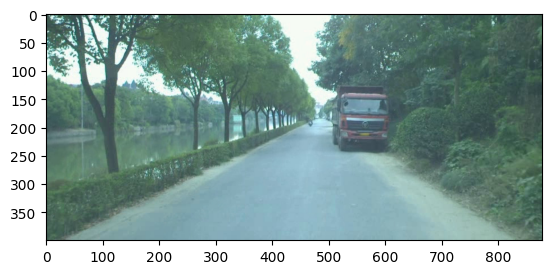

---------------------------------------------------------------
Scene transition  5


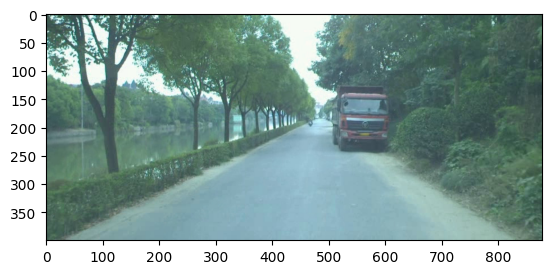

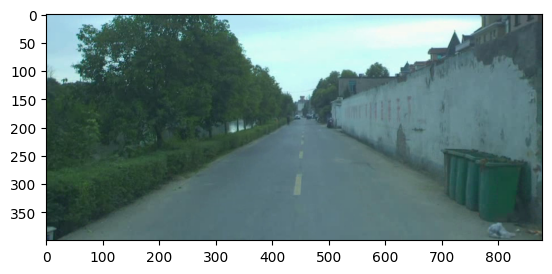

---------------------------------------------------------------
Scene transition  6


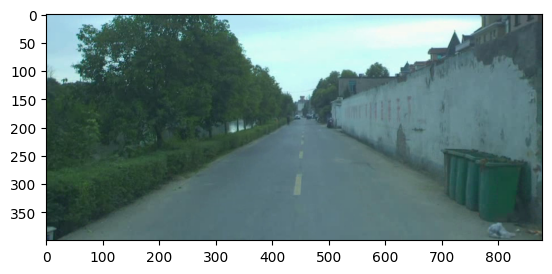

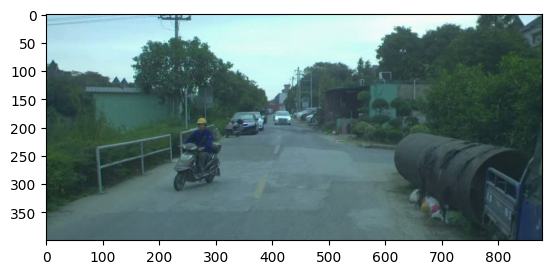

---------------------------------------------------------------
Scene transition  7


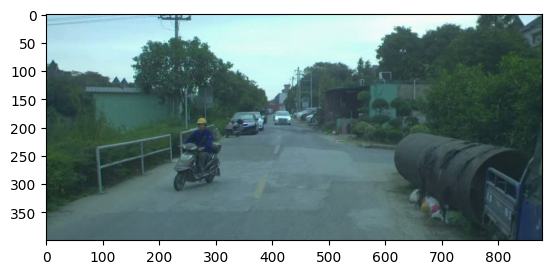

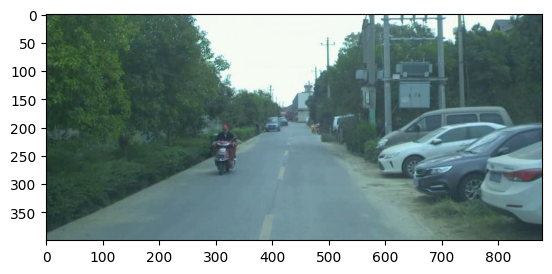

---------------------------------------------------------------


In [9]:
for i in range(1, len(scene_transitions) - 1):
    print('Scene transition ', i)
    
    plt.imshow(keyframes[i])
    plt.show()
    
    plt.imshow(keyframes[i+1])
    plt.show()
    print('---------------------------------------------------------------')

In [10]:
differences = [] 
for i in range(0, len(keyframes)-1):
    differences.append(np.sum(np.abs(keyframes[i+1] - keyframes[i])))
    
differences = np.array(differences)
differences

array([132806440,  92501790, 138258730, 126771789,  78381578, 168226644,
       130794601,  87990121, 149367012, 101871841, 107088611, 133336235,
       175140349, 108102882, 127789425, 112470188], dtype=uint32)

Max difference of sum of abs between two consecutive frames 175140349
Frame indices :  12  and  13


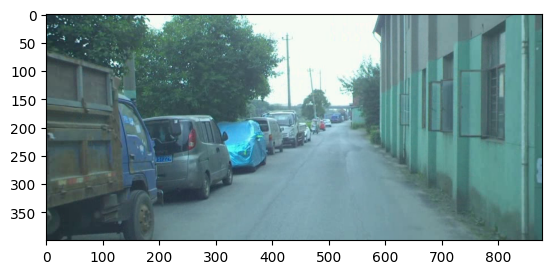

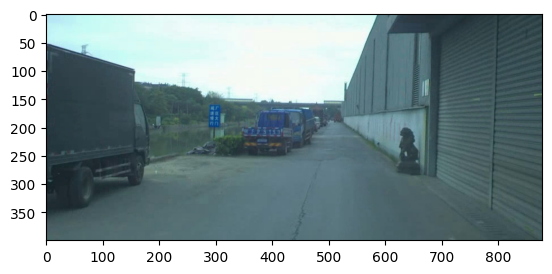

In [11]:
max_frame_index = differences.argmax(axis=0)
print("Max difference of sum of abs between two consecutive frames", differences[max_frame_index])
print('Frame indices : ', max_frame_index, ' and ', max_frame_index+1)
plt.imshow(keyframes[max_frame_index])
plt.show()
plt.imshow(keyframes[max_frame_index+1])

In [12]:
print(np.mean(ssim_scores))

0.49686875261138375


Find contrast of image

In [18]:
max_diff = 0
min_intensity = 0
max_intensity = 0

s = 0
for frame in keyframes:
    s += np.max(frame) - np.min(frame)
    if np.max(frame) - np.min(frame) > max_diff:
        max_diff = np.max(frame) - np.min(frame)
        max_intensity = np.max(frame)
        min_intensity = np.min(frame)
        
print('mean contrast : ', np.mean(s) / 255)

mean contrast :  16.470588235294116


In [16]:
print(max_diff, min_intensity, max_intensity)

255 0 255
